### PRACTICUM ASSIGNMENT

#### Create a K-Means model with the following conditions:

1. Use the 'Mall_Customers.csv' data.
2. Determine the appropriate features for clustering (at least 2).
3. Create a K-Means model considering the best number of clusters.
4. Reimplement the model by using SOM.

- Using 'Mall Customer.csv' data

In [22]:
# Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17224\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Encoding Gender

In [25]:
from sklearn.calibration import LabelEncoder

labelencoder=LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


- Clustering Feature

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17224\3267300215.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, palette='Set1')


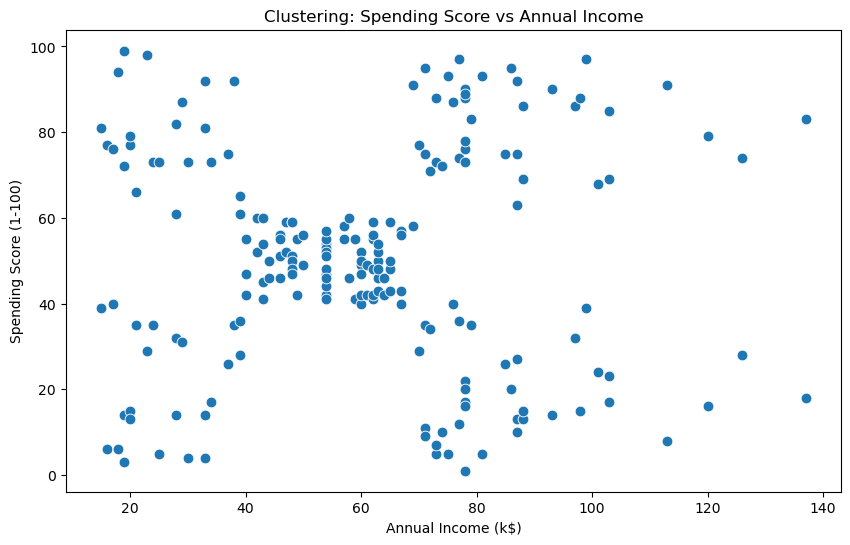

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select two features for analysis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Determine the number of clusters (for example, 5 clusters)
num_clusters = 5

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add 'Cluster' column to DataFrame
df['Cluster'] = kmeans.labels_

# Displays a scatter plot with color separation based on clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering: Spending Score vs Annual Income')
plt.show()

- Make K-Means Model

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

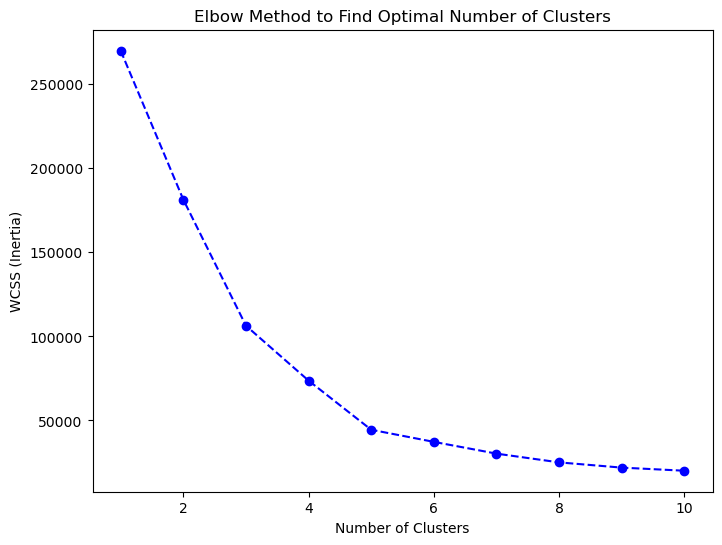

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select two features for analysis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Determine the best number of clusters using the elbow method
inertia = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, random_state=42)
     kmeans.fit(X)
     inertia.append(kmeans.inertia_)

# Displays elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()

In [29]:
from sklearn.cluster import KMeans

# Select two features for analysis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Initialize K-Means with the desired number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Perform clustering and get cluster-labels
df["label"] = kmeans.fit_predict(X)

# Output DataFrame with cluster-labels
print(df.head())

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  label  
0        4      4  
1        2      2  
2        4      4  
3        2      2  
4        4      4  


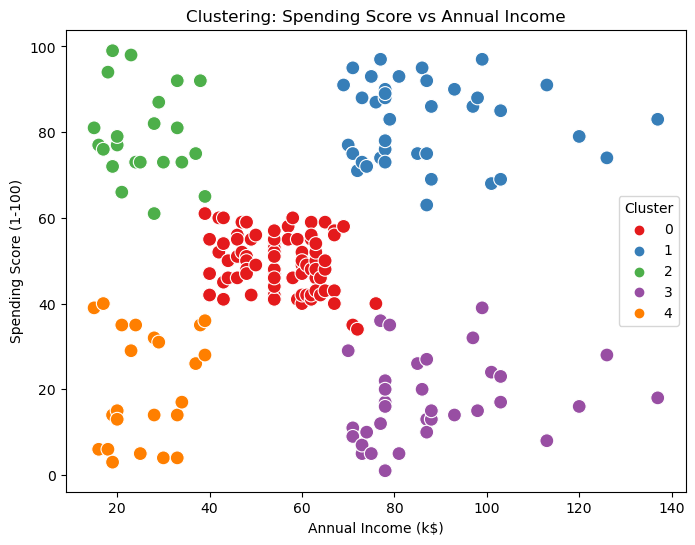

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering: Spending Score vs Annual Income')
plt.show()

From the image above, the Mall_Customers dataset has formed 5 different clusters. Blue clusters indicate customers who have the lowest income and expenditure scores. Meanwhile, orange is the customer with the highest income and expenditure scores

Feature Selection

In [31]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X)
X_train_std

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148,  1.79845761],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407,  0.41502868],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298,  1.79845761],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783,  0.41502868],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992,  1.79845761],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627,  0.41502868],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298,  1.79845761],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436,  0.41502868],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767,  1.79845761],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002,  0.41502868],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ,  1.79845761],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216,  0.41502868],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894,  1.79845761],
       [-0.88640526, -1.06573534, -1.5

- Create Image Segmentation using the Self-Organizing Map (SOM) Method

In [33]:
pip install minisom

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [35]:
# Function to initialize SOM weights
def initialize_weights(input_shape, output_shape):
     return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [36]:
# Function to calculate the distance between the input vector and the SOM weights
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [37]:
# Function to find the winning unit index (the unit with the closest weight)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [38]:
# Function to update SOM weights
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
     distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
     influence = np.exp(-distances / (2 * neighborhood_radius**2))
     weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [39]:
# Function to train SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

(-0.5, 669.5, 626.5, -0.5)

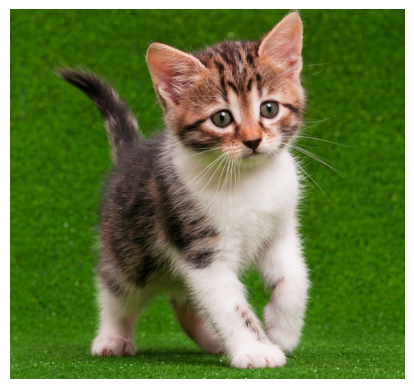

In [40]:
# Load image
img_path = "../img/kitten01.jpg"
img = io. imread(img_path) / 255.0
plt.imshow(img)
plt.axis('off')

In [11]:
# Train SOM
num_epochs = 50
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

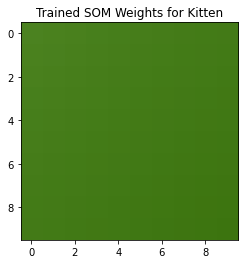

In [12]:
# Visualization of SOM weights
import matplotlib.pyplot as plt
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Kittens')
plt.show()